In [1]:
import numpy as np
import pandas as pd
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt

from utils import compute_reward, mapping

In [13]:
efficiency_map, city_map, year_map = mapping()

## Extract key statistics from simulation result

In [2]:
path='/home/user/Desktop/git/AlphaBuilding/imitationLearn/simulationData/'

TempMin, TempMax, Comfort, UncDegHour = [], [], [], []
Effi, City, Year, Run = [], [], [], []


for file in listdir(path):
    efficiency = file.split('_')[0]
    city = file.split('_')[2]
    year = file.split('_')[3]
    run = int(file.split('_')[4][0])
    
    dict_data = np.load(path+file)
    data = dict_data['arr_0']

    for data_timestep in data:
        zones_temp = data_timestep[8:17]
        T_set = data_timestep[17:26]
        officeHour = data_timestep[6]
        comfort, tempMin, tempMax, uncDegHour = compute_reward(zones_temp,T_set,officeHour)
        Comfort.append(comfort)
        UncDegHour.append(uncDegHour)
        TempMin.append(tempMin)
        TempMax.append(tempMax)
        Effi.append(efficiency)
        City.append(city)
        Year.append(year)
        Run.append(run)

In [3]:
result = pd.DataFrame(data={'comfort':Comfort,
                            'uncDegHour':UncDegHour,
                            'tempMin': TempMin,
                            'tempMax': TempMax,
                            'efficiency':Effi,
                            'city':City,
                            'year':Year,
                            'run':Run})

## Post-processing

In [4]:
# encode efficiency, city and year

result['efficiency'] = result['efficiency'].replace(efficiency_map)
result['city'] = result['city'].replace(city_map)
result['year'] = result['year'].replace(year_map).astype('int')

In [5]:
# reduce memory

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

reduce_mem_usage(result)

Mem. usage decreased to 242.41 Mb (79.7% reduction)


,comfort,uncDegHour,tempMin,tempMax,efficiency,city,year,run
0,27.734375,0.0,19.531250,19.531250,2,2,1988,2
1,28.093750,0.0,19.531250,19.531250,2,2,1988,2
2,29.140625,0.0,19.531250,19.531250,2,2,1988,2
3,30.203125,0.0,19.531250,19.531250,2,2,1988,2
4,31.000000,0.0,19.531250,19.531250,2,2,1988,2
...,...,...,...,...,...,...,...,...
19552873,83.875000,0.0,19.531250,19.531250,3,3,1980,1
19552874,108.562500,0.0,18.953125,18.953125,3,3,1980,1
19552875,65.375000,0.0,19.515625,19.515625,3,3,1980,1
19552876,98.312500,0.0,20.093750,20.093750,3,3,1980,1


In [6]:
result.to_csv('g36_sim.csv')

In [11]:
np.savez_compressed('g36_sim',result)

In [10]:
data = np.load('g36_sim.npz')

result_array = data['arr_0']

In [12]:
result = pd.DataFrame(result_array,columns=['comfort','uncDegHour','tempMin','tempMax','efficiency','city','year','run'])
result

,comfort,uncDegHour,tempMin,tempMax,efficiency,city,year,run
0,27.734375,0.0,19.531250,19.531250,2.0,2.0,1988.0,2.0
1,28.093750,0.0,19.531250,19.531250,2.0,2.0,1988.0,2.0
2,29.140625,0.0,19.531250,19.531250,2.0,2.0,1988.0,2.0
3,30.203125,0.0,19.531250,19.531250,2.0,2.0,1988.0,2.0
4,31.000000,0.0,19.531250,19.531250,2.0,2.0,1988.0,2.0
...,...,...,...,...,...,...,...,...
19552873,83.875000,0.0,19.531250,19.531250,3.0,3.0,1980.0,1.0
19552874,108.562500,0.0,18.953125,18.953125,3.0,3.0,1980.0,1.0
19552875,65.375000,0.0,19.515625,19.515625,3.0,3.0,1980.0,1.0
19552876,98.312500,0.0,20.093750,20.093750,3.0,3.0,1980.0,1.0


Text(0, 0.5, 'Minimum Zone Temperature / degC')

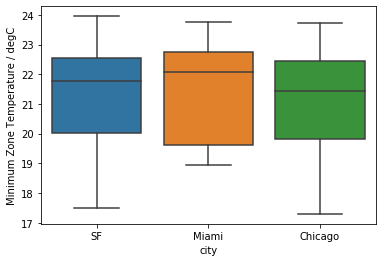

In [33]:
keys, values = zip(*city_map.items())

sns.boxplot(x="city", y="tempMin", data=result[['tempMin','city']].replace(values,keys))
plt.ylabel('Minimum Zone Temperature / degC')

Text(0, 0.5, 'Minimum Zone Temperature / degC')

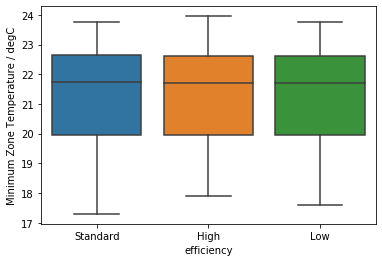

In [34]:
keys, values = zip(*efficiency_map.items())

sns.boxplot(x="efficiency", y="tempMin", data=result[['tempMin','efficiency']].replace(values,keys))
plt.ylabel('Minimum Zone Temperature / degC')

In [16]:
comfort = result.groupby(['efficiency','city','year','run']).comfort.sum()

comfort_df = pd.DataFrame(comfort).reset_index(level=['city', 'efficiency'])

Text(0, 0.5, 'Annually comfort reward')

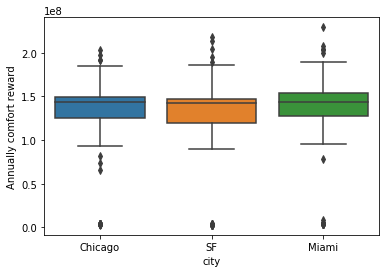

In [18]:
keys, values = zip(*city_map.items())

sns.boxplot(x="city", y="comfort", data=comfort_df[['comfort','city']].replace(values,keys))
plt.ylabel('Annually comfort reward')

In [14]:
uncDegHour_series = result.groupby(['efficiency','city','year','run']).uncDegHour.sum()

uncDegHour_df = pd.DataFrame(uncDegHour_series).reset_index(level=['city', 'efficiency'])

Text(0, 0.5, 'Uncomfortable Degree Hour')

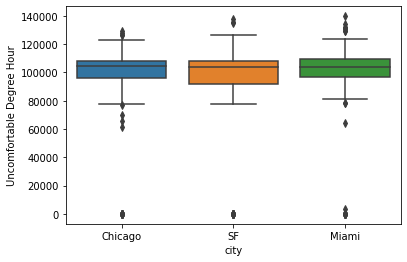

In [15]:
keys, values = zip(*city_map.items())

sns.boxplot(x="city", y="uncDegHour", data=uncDegHour_df[['uncDegHour','city']].replace(values,keys))
plt.ylabel('Uncomfortable Degree Hour')

In [62]:
uncDegHour_df

efficiency  city   uncDegHour
year run                               
0    1             1     1          0.0
     2             1     1  961018560.0
1980 1             1     1  820732608.0
     2             1     1  894472640.0
1981 1             1     1          0.0
...              ...   ...          ...
2003 2             3     3          0.0
2004 1             3     3  848909696.0
     2             3     3  934040448.0
2005 1             3     3  911858496.0
     2             3     3  736201344.0

[558 rows x 3 columns]